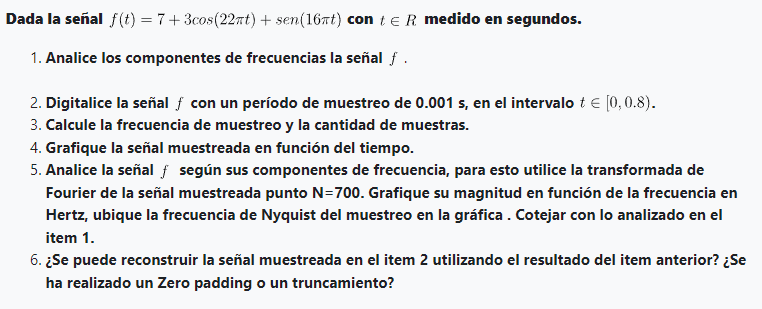

Se importan las librerías para trabajar con la señal:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift, ifft

pi = np.pi

*Punto 1:*

$f(x)=x_1(t)+x_2(t)+x_3(t)$

$x_1(t) = 7$ -> es una función constante (no tiene componente en frecuencia)

$x_2(t)=3*cos(22*\pi*t) => 2*\pi*f=22*\pi => f=22/2 => f = 11[Hz]$

$x_3(t)=sin(16\pi*t) => 2*\pi*f=16*\pi => f=8[Hz]$

<mark>Las señales tienen distintas frecuencias, qué puedo concluir de esto??</mark>

Se define la función $f(x)$:


In [11]:
# Se genera un vector de tiempo con la frecuencia de muestreo solicitada
pM = 0.001 # período de muestreo
t = np.arange(0,0.8,pM)
# print(t)

# se define la señal f(t) con el vector de tiempos genereados
f = 7+(3*np.cos(22*pi*t))+np.sin(16*pi*t)

Se define la frecuencia de muestreo y la cantidad de muestras:

In [12]:
# frecuencia de muestreo
fm = 1/pM
print("Frecuencia de muestreo: ", str(fm))

# cantidad de muestras
M = len(f)
print("Cantidad de muestras: ", str(M))

Frecuencia de muestreo:  1000.0
Cantidad de muestras:  800


Se grafica la senal muestreada en funcion del tiempo:

Text(0, 0.5, 'Valor de la senal')

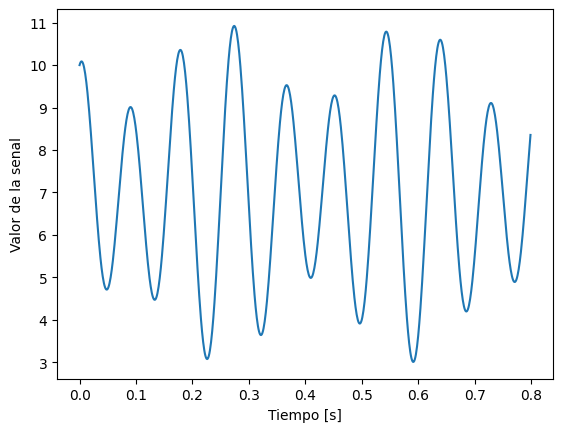

In [13]:
plt.plot(t,f)
plt.xlabel('Tiempo [s]')
plt.ylabel('Valor de la senal')

Se analiza la senal en el espectro de frecuencia, utilizando DFT.N

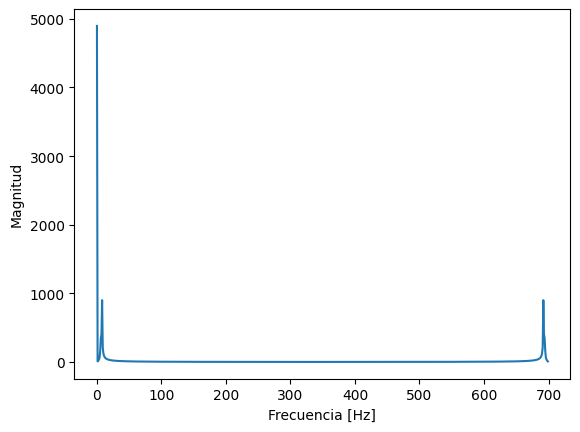

In [14]:
N = 700 # numero de muestras con el que se calcula la DFT
dft = fft(f, N)

# magnitud de la senal 
dftAbs = np.abs(dft)

plt.plot(dftAbs)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.show()

Se busca la frecuencia de Nyquist

Frecuencia de Nyquist:  500.0


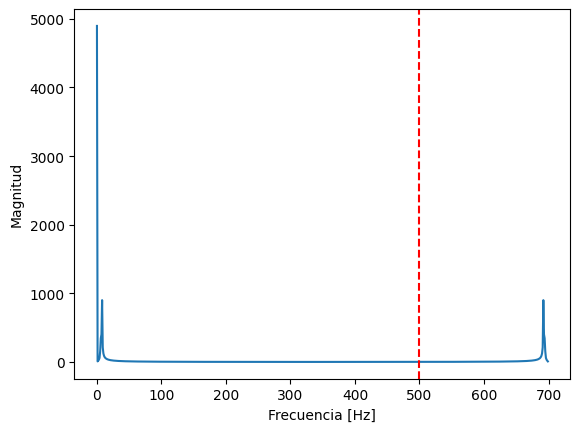

In [22]:
# frecuencia de nyquist
fNyq = fm/2
print('Frecuencia de Nyquist: ', str(fNyq))

plt.plot(dftAbs)
plt.axvline(x=fNyq, color='red', label='Freq. de Nyquist', linestyle='dashed')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.show()

Dado que la señal está compuesta por señales con distintas frecuencias, cuando analizamos su espectro de frecuencias utilizando la DFT.N, podemos notar que??

Verificamos si se puede reconstruir la señal, para eso vemos si la cantidad de muestras es mayor a los puntos de la DFT.N:

In [23]:
# Verificamos
print("¿Es M>N? ", M>N)
if(M>N):
    print("Se ha hecho un truncamiento. No se puede recuperar toda la señal original.")
else:
    print("Se ha hecho un zero-padding. Se puede recuperar toda la señal original.")

¿Es M>N?  True
Se ha hecho un truncamiento. No se puede recuperar toda la señal original.


Luego, si se realiza la transformada inversa de fourier, vemos que no podemos recuperar la señal original:


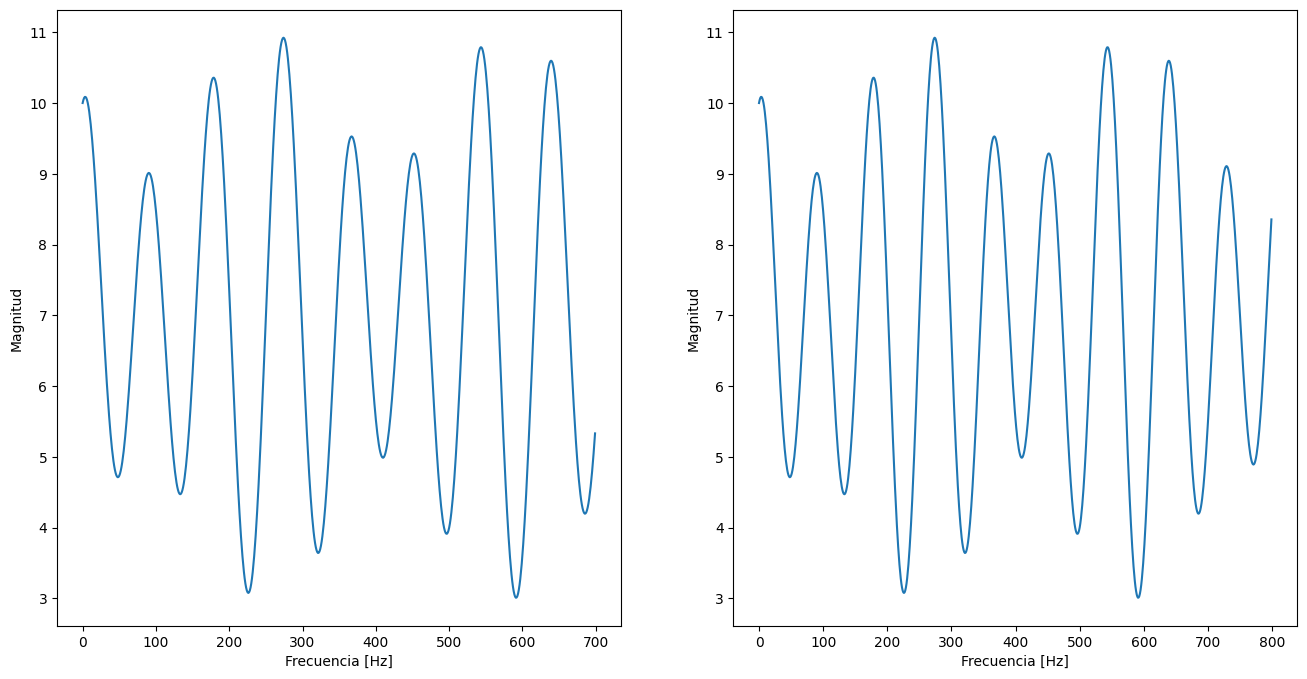

In [28]:
f_recuperada = ifft(dft)
plt.figure(figsize=[16,8])

plt.subplot(121)
plt.plot(f_recuperada)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

plt.subplot(122)
plt.plot(f)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

plt.show()

Vemos que ambas señales son iguales, sin embargo, la señal recuperada (izquierda) termina cuando el valor de frecuencia llega a los 700 Hz, mientras que la señal original (derecha) se ve completa, hasta el valor de frecuencia de 800 Hz